## Лабораторная Работа №5


#### Шарифов Фаррух Рустамович N33472 <b>
    Вариант 4

Построить прогноз на 8 месяцев. 

Средняя цена номера в отеле в долларах (Average Daily Rate (in $)) Данные для Chicago Metropolitan Area . Предоставлены средние значения цены за один день. Усреднение по отелям и по дням месяца.
Данные расположены в столбце x4 файла Chicago_hotels.csv

In [493]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
#   Для разнообразия
matplotlib.style.use('seaborn')
%matplotlib inline

In [494]:
from sklearn.linear_model import LinearRegression

In [495]:
import os

os.chdir("C:/Users/Farrukh99/Desktop/subjects/3/Data processing/лекция 6/Lab5")

In [496]:
df = pd.read_csv('Chicago_hotels1.dat', sep=';', decimal='.')
df.head()

,x4
0,72.15
1,73.47
2,74.91
3,79.06
4,82.07


In [497]:
df

,x4
0,72.15
1,73.47
2,74.91
3,79.06
4,82.07
...,...
107,99.10
108,92.88
109,90.99
110,99.62


Построим график продаж. 


<AxesSubplot:>

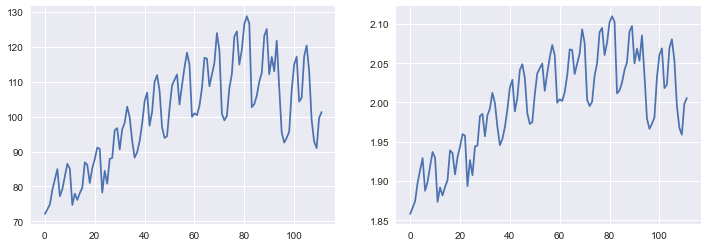

In [498]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['x4'].plot(ax=ax1)


ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['x4'])).plot(ax=ax2)


Тренд описывается параболой.  <br>
мультипликативная сезонность. <br>
На втором графике ряд логарифмов исходного ряда. На нем сезонные поправки стали аддитивными, это подтверждает гипотезу о мультипликативном характере сезонности.<br>
Ряд не изменяет свой характер. <br>


будем прогнозировать логарифм продаж с помощью модели линейной регрессии. 
$$\log y_i = \alpha + \beta \cdot x_i + c(x_i) + \varepsilon_i,$$
где $y_i$ -- объём продаж, $x_i$ -- порядковый номер месяца, $c(x_i)$ -- сезонная составляющая, $\varepsilon_i$ -- случайные отклонения.

Прологарифмируем временной ряд.

In [499]:
df_0 = pd.DataFrame(np.log10(df['x4']))

In [500]:
print(df_0)

           x4
0    1.858236
1    1.866110
2    1.874540
3    1.897957
4    1.914184
..        ...
107  1.996074
108  1.967922
109  1.958994
110  1.998347
111  2.005695

[112 rows x 1 columns]


Создадим регрессионную переменную ```month_num``` -- порядковый номер пары (месяц, год). Тем самым мы зададим линейный тренд

In [501]:
df_0['month_num'] = range(1, len(df_0) + 1)
#df_0['t^2'] = df_0['month_num']**2

df_0.head()

,x4,month_num
0,1.858236,1
1,1.866110,2
2,1.874540,3
3,1.897957,4
4,1.914184,5


Создадим новые переменные.(создаем строки за запасом, а затем отрезаем лишние)

In [502]:
df_0["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*10)[0:len(df_0)]
df_0["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*10)[0:len(df_0)]
df_0["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*10)[0:len(df_0)]
df_0["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*10)[0:len(df_0)]
df_0["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*10)[0:len(df_0)]
df_0["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]


In [503]:
df_0.head(12)

,x4,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1.858236,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1.866110,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1.874540,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1.897957,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1.914184,5,0,0,0,0,1,0,0,0,0,0,0,0
5,1.929215,6,0,0,0,0,0,1,0,0,0,0,0,0
6,1.887730,7,0,0,0,0,0,0,1,0,0,0,0,0
7,1.898999,8,0,0,0,0,0,0,0,1,0,0,0,0
8,1.918712,9,0,0,0,0,0,0,0,0,1,0,0,0
9,1.936966,10,0,0,0,0,0,0,0,0,0,1,0,0


In [504]:
#  Создаем таблицу (столбец) откликов.
y = df_0['x4']

In [505]:
#  Создаем матрицу предикторов.
#  Убираем из нее отклик и столбец индикаторов базового месяца
#  За базу берем январь,

X = df_0.drop(columns=["x4", "m01"])

In [506]:
X

,month_num,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,0,0,0,0,0,0,0,0,0,0,1
108,109,0,0,0,0,0,0,0,0,0,0,0
109,110,1,0,0,0,0,0,0,0,0,0,0
110,111,0,1,0,0,0,0,0,0,0,0,0


In [507]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

Посмотрим на коэффициенты модели

In [508]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,1.876276
1,month_num,0.001421
2,m02,-0.001489
3,m03,0.018512
4,m04,0.035838
5,m05,0.071319
6,m06,0.075446
7,m07,0.036788
8,m08,0.052322
9,m09,0.069313


In [509]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [510]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,1.876276,0.000000e+00
1,month_num,0.001421,0.000000e+00
2,m02,-0.001489,9.182646e-01
3,m03,0.018512,2.035911e-01
4,m04,0.035838,1.480945e-02
5,m05,0.071319,5.073717e-06
6,m06,0.075446,1.580028e-06
7,m07,0.036788,1.487524e-02
8,m08,0.052322,6.301025e-04
9,m09,0.069313,8.816414e-06


<AxesSubplot:>

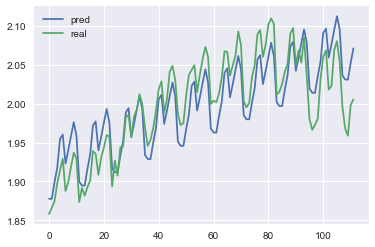

In [511]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [512]:
pred.head(14)

,pred,real
0,1.877697,1.858236
1,1.877629,1.866110
2,1.899051,1.874540
3,1.917799,1.897957
4,1.954700,1.914184
5,1.960249,1.929215
6,1.923012,1.887730
7,1.939967,1.898999
8,1.958379,1.918712
9,1.976159,1.936966


Только что построили подгонку (fit), используя модель для временного ряда.
Переходим к прогнозированию.

In [513]:
print("Исторические данные за ", len(df), " месяцев")
print("Это составляет ", len(df)//12, " полных лет")
print("И еще ", len(df) % 12, " месяцев.")

Исторические данные за  112  месяцев
Это составляет  9  полных лет
И еще  4  месяцев.


In [514]:
#  Готовим матрицу значений предикторов df_3 
#  для вычисления прогнозов на 8 месяцев вперед
#  Сначала добавляем в нее время (номер месяца)

df_3= pd.DataFrame()

df_3['month_num'] = range(len(df_0)+1, len(df_0)+9)

In [515]:
df_3


,month_num
0,113
1,114
2,115
3,116
4,117
5,118
6,119
7,120


In [516]:
#  Добавляем индикаторы месяцев. Базового месяца снова не должно быть
# df_3["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0])[0: 8 ]
df_3["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0])[0: 8 ]
df_3["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0])[0: 8 ]
df_3["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0])[0: 8 ]
df_3["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0])[0: 8 ]
df_3["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0])[0: 8 ]
df_3["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0])[0: 8 ]
df_3["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1])[0: 8 ]

In [517]:
#  Все хорошо?
df_3.head()

,month_num,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,113,0,0,0,0,0,0,0,0,0,0,0
1,114,1,0,0,0,0,0,0,0,0,0,0
2,115,0,1,0,0,0,0,0,0,0,0,0
3,116,0,0,1,0,0,0,0,0,0,0,0
4,117,0,0,0,1,0,0,0,0,0,0,0


In [518]:
#  Предикторы готовы, можно вычислить прогноз для логарфмов
model.predict(df_3)

array([2.03686995, 2.03680245, 2.05822439, 2.07697189, 2.1138737 ,
       2.11942221, 2.08218554, 2.09914041])

In [519]:
#  Прогноз для исходного ряда
y1 = 10**model.predict(df_3)

In [520]:
y1


array([108.86040522, 108.84348823, 114.34689903, 119.39108222,
       129.97915316, 131.65040857, 120.83299505, 125.6436116 ])

In [521]:
#  матрица с подгонкой
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
0,1.877697,1.858236,NaN
1,1.877629,1.866110,NaN
2,1.899051,1.874540,NaN
3,1.917799,1.897957,NaN
4,1.954700,1.914184,NaN


In [522]:
#  Продолжение предыдущей матрицы. 
#  Оно содержит спрогнозированные значения для месяцев c 112 до 120.
#  Для этих месяцев есть спрогнозированные значения, 
#  но нет исторических и подгонки.

#  Порядок столбцов не важен. 
#  Имена столбцов должны быть как в матрице pred ране

pred_2 = pd.DataFrame(model.predict(df_3), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

pred_2.head()

,forecast,real,pred
0,2.036870,NaN,NaN
1,2.036802,NaN,NaN
2,2.058224,NaN,NaN
3,2.076972,NaN,NaN
4,2.113874,NaN,NaN


<AxesSubplot:>

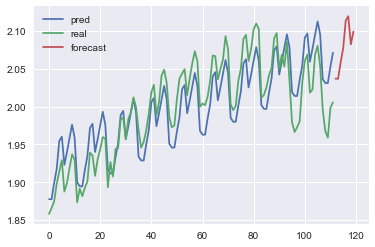

In [523]:
#  объединяем матрицы, задаем новые индексы
pred_3 = pd.concat(
    [pred, pred_2],
    sort=False
).reset_index(drop=True)

pred_3.plot()

In [524]:
#  Возвращаемся к исходному ряду
pred_4 = 10**pred_3

<AxesSubplot:>

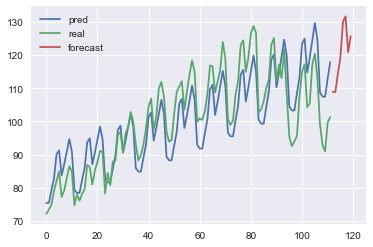

In [525]:
pred_4.plot()